In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
os.chdir('C:\\Users\\anush\\Downloads\\Python Foundation Case Study 1 - Retail Case Study (1)\\Case Study 1 - Retail Case Study')

In [3]:
cust_df=pd.read_csv('Customer.csv')
cust_df.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
prod_df=pd.read_csv('prod_cat_info.csv')
prod_df.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
tran_df=pd.read_csv('Transactions.csv')
tran_df.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
tran_df.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [7]:
cust_df.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [8]:
prod_df.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

In [9]:
# case-1 
# using left_on and right_on
# then drop the repeated column

In [10]:
tc_df=pd.merge(left=tran_df,right=cust_df,left_on='cust_id',right_on='customer_Id',how='inner').drop('customer_Id',axis=1)
tc_df.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,26-09-1981,M,5.0


In [11]:
final_df=pd.merge(left=tc_df,right=prod_df,left_on=['prod_subcat_code','prod_cat_code'],right_on=['prod_sub_cat_code', 'prod_cat_code'],how='inner').drop('prod_sub_cat_code',axis=1)
final_df.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,26-09-1981,M,5.0,Clothing,Women


In [12]:
#case-2 merging using rename then using on

In [13]:
cust_df.rename(columns={'customer_Id':'cust_id'},inplace=True)

In [14]:
prod_df.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

In [15]:
cust_df.head(1)

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


In [16]:
prod_df.head(1)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens


In [17]:
df_tc=pd.merge(left=tran_df,right=cust_df,on='cust_id',how='inner')
df_tc.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,26-09-1981,M,5.0


In [18]:
final_df=pd.merge(left=df_tc,right=prod_df,on=['prod_subcat_code','prod_cat_code'],how='inner')
final_df.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,26-09-1981,M,5.0,Clothing,Women


In [19]:
# EDA- Exploratory data analysis

In [20]:
# First 5 rows
final_df.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,26-09-1981,M,5.0,Clothing,Women


In [21]:
final_df.tail(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,Children


### Shape of the data

In [22]:
final_df.shape

(23053, 15)

In [23]:
print('The dataset has',final_df.shape[0],'rows and',final_df.shape[1],'columns')

The dataset has 23053 rows and 15 columns


#### dataset info

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  DOB               23053 non-null  object 
 11  Gender            23044 non-null  object 
 12  city_code         23045 non-null  float64
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


##### observations
- column- Gender & city_code have null values
- tran_date & DOB have wrong data-type

#### Correcting Data Types

In [25]:
final_df.tran_date=final_df.tran_date.str.replace('/','-')

In [26]:
final_df.tran_date=pd.to_datetime(final_df.tran_date, format='%d-%m-%Y')

In [27]:
final_df.DOB=pd.to_datetime(final_df.DOB, format='%d-%m-%Y')

#### Checking Data Types Again

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  DOB               23053 non-null  datetime64[ns]
 11  Gender            23044 non-null  object        
 12  city_code         23045 non-null  float64       
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

#### Data Types are Corrected Now

##### 5-point summary

In [29]:
# 5-point summary of numerical columns
final_df.describe().T

,count,mean,min,25%,50%,75%,max,std
transaction_id,23053.0,50073480358.450485,3268991.0,24938639453.0,50093131361.0,75329995679.0,99987549630.0,28981936061.995857
cust_id,23053.0,271021.746497,266783.0,268935.0,270980.0,273114.0,275265.0,2431.692059
tran_date,23053,2012-08-09 05:21:26.617793792,2011-01-25 00:00:00,2011-11-03 00:00:00,2012-08-11 00:00:00,2013-05-17 00:00:00,2014-02-28 00:00:00,NaN
prod_subcat_code,23053.0,6.149091,1.0,3.0,5.0,10.0,12.0,3.726372
prod_cat_code,23053.0,3.763632,1.0,2.0,4.0,5.0,6.0,1.677016
Qty,23053.0,2.432395,-5.0,1.0,3.0,4.0,5.0,2.268406
Rate,23053.0,636.369713,-1499.0,312.0,710.0,1109.0,1500.0,622.363498
Tax,23053.0,248.667192,7.35,98.28,199.08,365.715,787.5,187.177773
total_amt,23053.0,2107.308002,-8270.925,762.45,1754.74,3569.15,8287.5,2507.561264
DOB,23053,1981-07-14 21:22:57.816336256,1970-01-02 00:00:00,1975-09-26 00:00:00,1981-06-16 00:00:00,1987-06-05 00:00:00,1992-12-29 00:00:00,NaN


In [30]:
# 5-point summary for categorical columns
final_df.describe(include='object').T

,count,unique,top,freq
Store_type,23053,4,e-Shop,9311
Gender,23044,2,M,11811
prod_cat,23053,6,Books,6069
prod_subcat,23053,18,Women,3048


###### obervations on categorical columns
- e-shop is most used store_type
- books are most selling category
-  most popular sub-category is women             

### checking discrepancies in categorical columns



In [31]:
cat_df=final_df.select_dtypes(include='object')

In [32]:
for i in cat_df.columns:
    print('\n')
    print(final_df[i].value_counts())
    print('\n')



Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64




Gender
M    11811
F    11233
Name: count, dtype: int64




prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64




prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64




#### There is no discrepancy in the categorical columns

#### Checking Missing Values

In [33]:
(final_df.isna().sum()/len(final_df))*100

transaction_id      0.000000
cust_id             0.000000
tran_date           0.000000
prod_subcat_code    0.000000
prod_cat_code       0.000000
Qty                 0.000000
Rate                0.000000
Tax                 0.000000
total_amt           0.000000
Store_type          0.000000
DOB                 0.000000
Gender              0.039040
city_code           0.034703
prod_cat            0.000000
prod_subcat         0.000000
dtype: float64

#### As the Percentage of Missing Values is less than 5%, we're gonna remove the missing values

In [34]:
final_df=final_df.dropna()

#### The Missing Values are removed

#### Checking Duplicates

In [35]:
final_df.duplicated().sum()

13

#### There are 13 duplicate values

#### Removing Duplicates

In [36]:
final_df=final_df.drop_duplicates()

#### Duplicates are removed

#### Univariate Analysis

#### Bivariate Analysis

#### Checking Outliers for the column 'Qty'

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

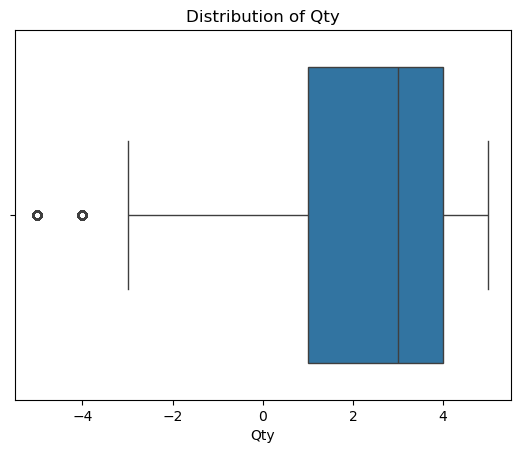

In [38]:
sns.boxplot(data=final_df,x='Qty')
plt.title('Distribution of Qty')
plt.show()

#### Outliers exist in the Qty column

#### Treating Outliers for the column 'Qty'

In [39]:
q1=final_df.Qty.quantile(0.25)
q3=final_df.Qty.quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
final_df.Qty=final_df.Qty.clip(lower=lr,upper=ur)

#### Checking Outliers for the column 'Qty'

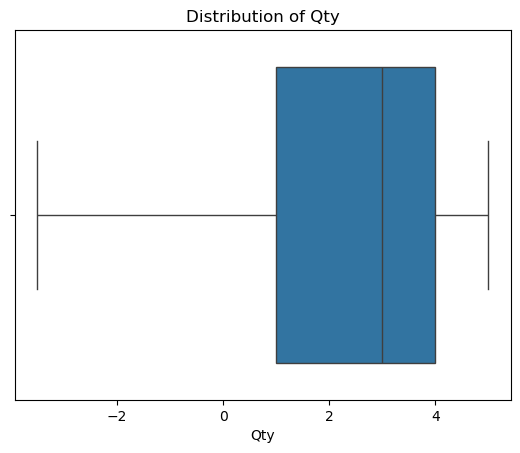

In [40]:
sns.boxplot(data=final_df,x='Qty')
plt.title('Distribution of Qty')
plt.show()

In [41]:
# Frequency table for all categorical variables

for i in ['tran_date', 'Store_type', 'DOB', 'Gender', 'prod_cat', 'prod_subcat']:
    print(i)
    print('\n')
    cat_f = final_df[i].value_counts()
    print(cat_f)
    print('\n')

tran_date


tran_date
2011-07-13    35
2011-10-23    33
2011-09-25    33
2011-11-22    33
2013-12-21    33
              ..
2014-02-23     2
2014-02-24     2
2014-02-27     1
2014-02-21     1
2014-02-28     1
Name: count, Length: 1129, dtype: int64


Store_type


Store_type
e-Shop            9299
MBR               4658
Flagship store    4573
TeleShop          4493
Name: count, dtype: int64


DOB


DOB
1988-12-27    32
1982-09-17    32
1974-02-25    27
1972-03-20    25
1970-06-09    24
              ..
1976-01-29     1
1980-05-01     1
1988-06-23     1
1985-06-25     1
1972-06-10     1
Name: count, Length: 3984, dtype: int64


Gender


Gender
M    11798
F    11225
Name: count, dtype: int64


prod_cat


prod_cat
Books               6061
Electronics         4891
Home and kitchen    4123
Footwear            2995
Clothing            2957
Bags                1996
Name: count, dtype: int64


prod_subcat


prod_subcat
Women                  3044
Mens                   2909
Kids                

#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [42]:
final_df.select_dtypes(include='number').head(2)

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
0,80712190438,270351,1,1,-3.5,-772,405.300,-4265.300,5.0
1,29258453508,270384,5,3,-3.5,-1497,785.925,-8270.925,8.0


#### Histograms for all continuous variables

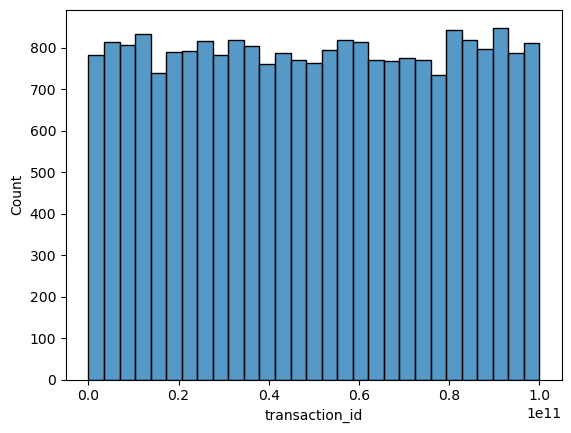

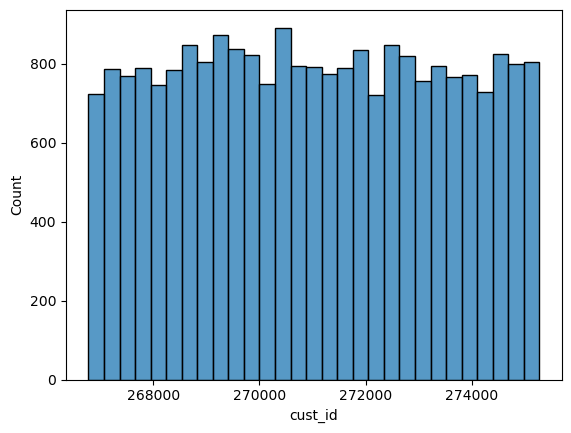

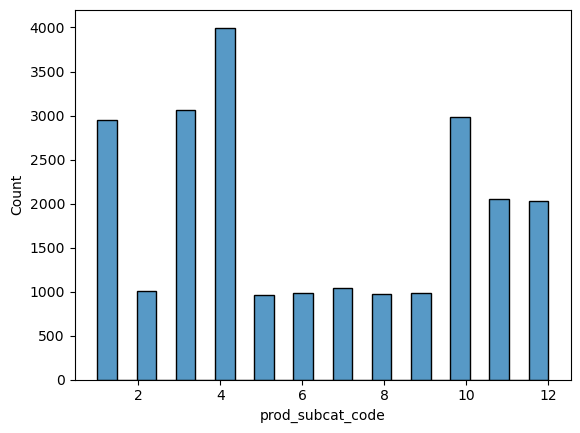

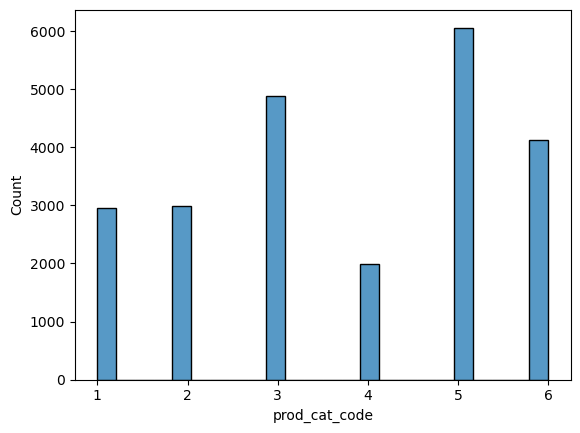

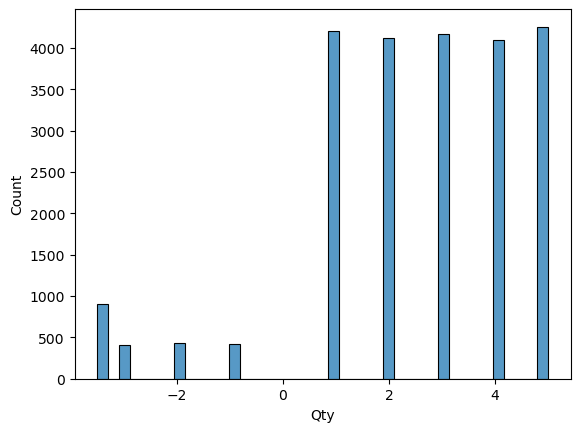

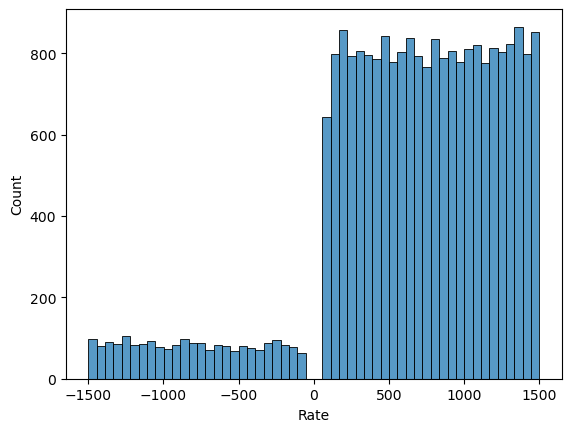

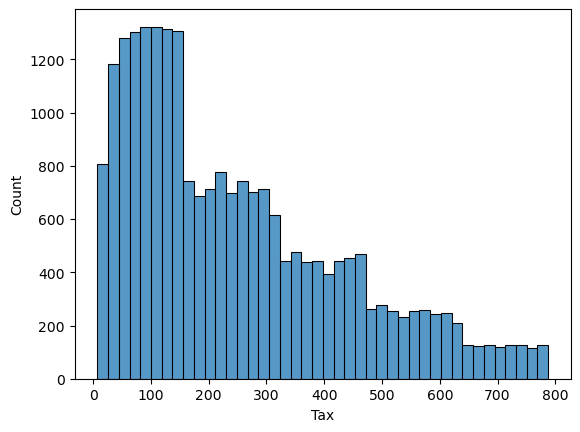

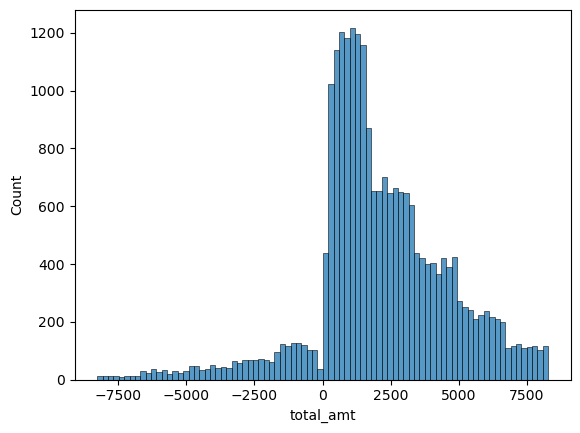

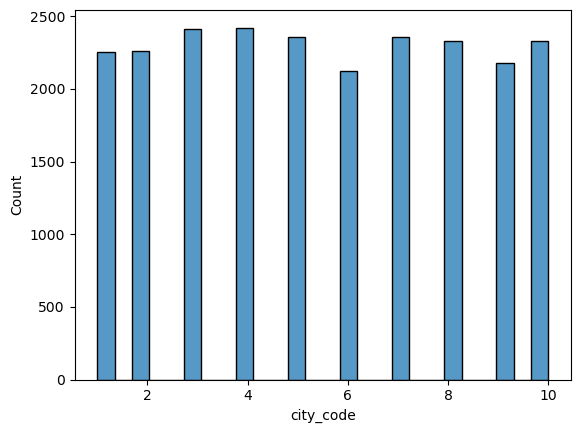

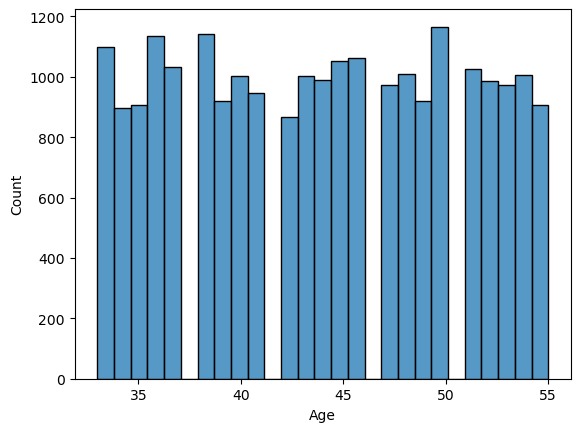

In [67]:
cont_df = final_df.select_dtypes('number')
for i in cont_df.columns:
    sns.histplot(data=final_df,x=i)
    plt.show()

#### frequency bars for categorical variables

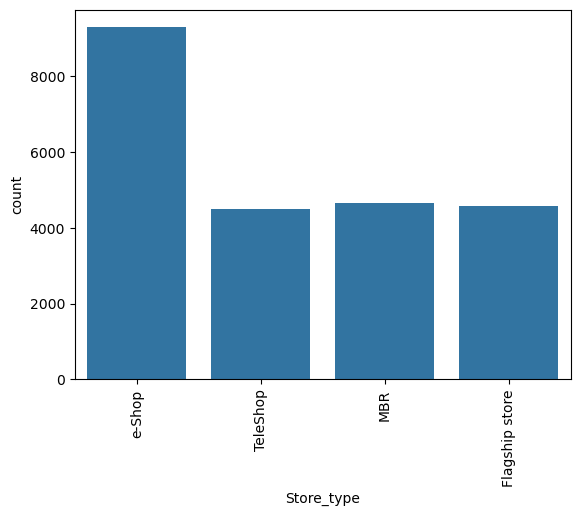

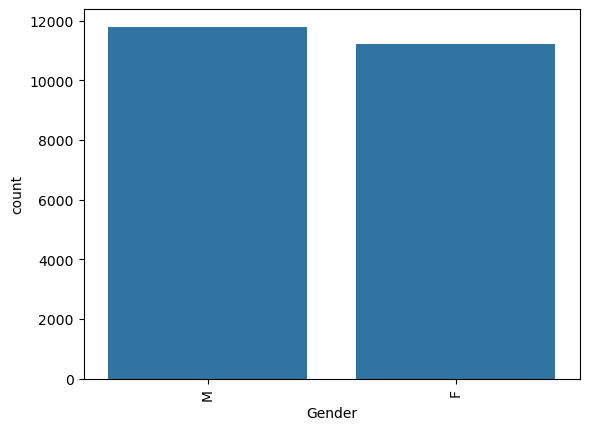

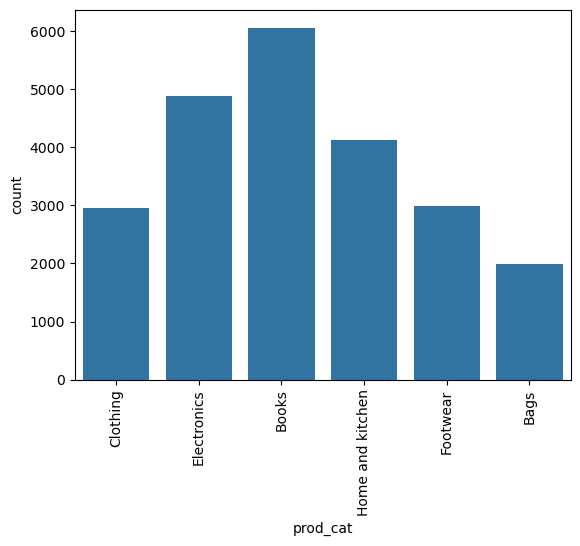

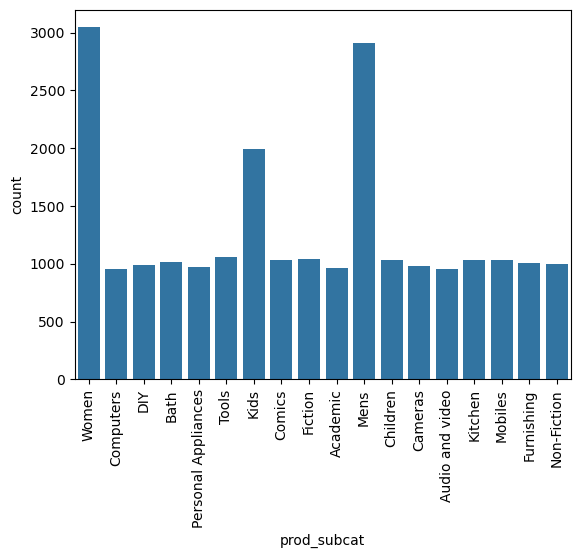

In [74]:
cat_df = final_df.select_dtypes(include='object')
for i in cat_df.columns:
    sns.countplot(data=final_df,x=i)
    plt.xticks(rotation=90)
    plt.show()

#### 4. Calculate the following information using the merged dataset :
 a. Time period of the available transaction data
 b. Count of transactions where the total amount of transaction was negative

a. Time period of the available transaction data

In [46]:
print('The time period of the transaction data is',final_df.tran_date.min(),'to',final_df.tran_date.max())

The time period of the transaction data is 2011-01-25 00:00:00 to 2014-02-28 00:00:00


b. Count of transactions where the total amount of transaction was negative

In [47]:
neg_tran_count = np.where(final_df.total_amt < 0, True,False).sum()
print('The count of transactions where the total amount was negative =',neg_tran_count)

The count of transactions where the total amount was negative = 2163


####  5. Analyze which product categories are more popular among females vs male customers.

In [48]:
pcat_count_by_gender = final_df[['prod_cat','Gender']].groupby(by='Gender').count()

In [49]:
pcat_count_by_gender

,prod_cat
Gender,
F,11225
M,11798


#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [50]:
city_count_sorted=final_df[['city_code','cust_id']].groupby(by='city_code').count().sort_values(by='cust_id',ascending=False)
top_city = city_count_sorted.iloc[0]
max_city_count=top_city['cust_id']
max_city_code=top_city.name
total_cust = final_df.cust_id.count()
percent_cust = (max_city_count/total_cust) * 100
print('City code with max customers is',max_city_code)
print('Percentage of customers is',round(percent_cust,2),'%')

City code with max customers is 4.0
Percentage of customers is 10.52 %


#### 7. Which store type sells the maximum products by value and by quantity?

In [51]:
prod_by_qty = final_df[['Store_type','Qty']].groupby(by='Store_type').sum().sort_values(by='Qty',ascending=False)
prod_by_amt = final_df[['Store_type','total_amt']].groupby(by='Store_type').sum().sort_values(by='total_amt',ascending=False)
max_qty_store= prod_by_qty.index[0]
max_qty_value= prod_by_qty.iloc[0]['Qty']
max_amt_store= prod_by_amt.index[0]
max_amt_value= prod_by_amt.iloc[0]['total_amt']
print('Store with max qty sold is',max_qty_store,'with',max_qty_value,'units')
print('Store with max sales total amt is',max_amt_store,'with','$',max_amt_value,'in total sales')

Store with max qty sold is e-Shop with 23139.0 units
Store with max sales total amt is e-Shop with $ 19838944.58 in total sales


#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [52]:
filtered_df = final_df[(final_df['Store_type'] == 'Flagship store') & (final_df['prod_cat'].isin(['Electronics','Clothing']))]
amt_by_store= filtered_df[['Store_type','total_amt']].groupby(by='Store_type').sum()
amt_by_cat= filtered_df[['prod_cat','total_amt']].groupby(by='prod_cat').sum()
print('The total amount earned from the Clothing is',amt_by_cat.iloc[0]['total_amt'],'and Electronics is',amt_by_cat.iloc[1]['total_amt'])
print('The total amount earned from flagship stores is',amt_by_store.iloc[0]['total_amt'])

The total amount earned from the Clothing is 1194423.23 and Electronics is 2214512.82
The total amount earned from flagship stores is 3408936.05


####  9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [53]:
filtered_df1 = final_df[(final_df['Gender'] == 'M') & (final_df['prod_cat'] == 'Electronics')]
result_amt = filtered_df1[['Gender','prod_cat','total_amt']].groupby(by=['Gender','prod_cat']).sum()
print('The amt earned from Male customers under Electronics category is',result_amt.iloc[0]['total_amt'])

The amt earned from Male customers under Electronics category is 5705871.925


#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [54]:
filter_df = final_df[final_df['total_amt'] > 0]
tran_count = filter_df[['transaction_id','cust_id']].groupby(by='cust_id').count()
result = tran_count[tran_count['transaction_id'] > 10]
print('Customers having more than 10 unique transactions are',result.shape[0])

Customers having more than 10 unique transactions are 6


####  11. For all customers aged between 25 - 35, find out:
##### a. What was the total amount spent for “Electronics” and “Books” product categories?
##### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [55]:
final_df['Age']=pd.Timestamp.today().year - final_df['DOB'].dt.year

In [56]:
final_df.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat', 'Age'],
      dtype='object')

In [57]:
filtered_df2 = final_df[(final_df['Age'] >= 25) & (final_df['Age'] <= 35)]

In [58]:
# A
df_by_prodcat = filtered_df2[filtered_df2['prod_cat'].isin(['Electronics','Books'])]
amt_by_cat = df_by_prodcat[['prod_cat','total_amt']].groupby(by='prod_cat').sum()
print('Total amount spent for Electronics is',amt_by_cat.iloc[0]['total_amt'])
print('Total amount spent for Books is',amt_by_cat.iloc[1]['total_amt'])

Total amount spent for Electronics is 1544727.015
Total amount spent for Books is 1250268.825


In [59]:
# B

In [60]:
amt_by_date = filtered_df2[(filtered_df2['tran_date'] >= '2014-01-01') & (filtered_df2['tran_date'] <= '2014-03-01')].total_amt.sum()
print('The total amount spent by customers between 1st Jan,2014 to 1st Mar,2014 is',amt_by_date)

The total amount spent by customers between 1st Jan,2014 to 1st Mar,2014 is 313650.93500000006
